In [52]:
# pip install --upgrade pandas

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd
from pandas import DataFrame as df

# 이미지 불러오기

(40, 100, 3)


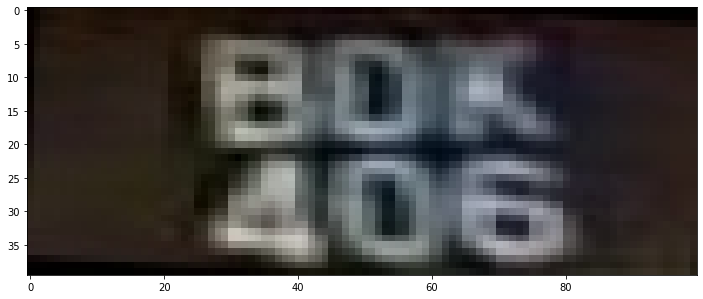

In [17]:
img_ori = cv2.imread('./sample/rotated_011391179432465.jpg')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')
print(img_ori.shape)

# Crop 양사이드

(40, 80, 3)


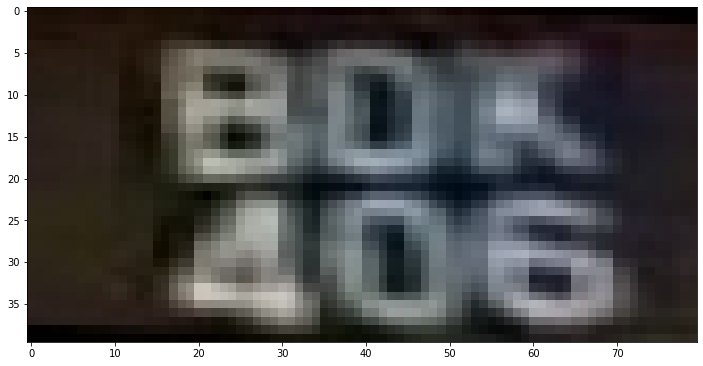

In [18]:
no_side_image = img_ori[0:height, 10:width-10]

height, width, channel = no_side_image.shape

plt.figure(figsize=(12, 10))
plt.imshow(no_side_image, cmap='gray')
print(no_side_image.shape)

In [19]:
characrter_list_image = []

In [20]:
# # Add black border to the image
# # copyMakeBorder = 액자만들어주는 함수

# BLACK = [0, 0, 0]
# img = cv2.copyMakeBorder(no_side_image, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=BLACK)


# plt.figure(figsize=(12, 10))
# plt.imshow(img, cmap='gray')

In [21]:
# change to gray
gray = cv2.cvtColor(no_side_image, cv2.COLOR_BGR2GRAY)

In [22]:
# Change to numpy array format
nb = np.array(gray)
nb

array([[15, 13, 12, ...,  0,  1,  1],
       [17, 16, 15, ...,  1,  0,  0],
       [17, 17, 18, ..., 25, 22, 21],
       ...,
       [29, 30, 31, ..., 33, 34, 36],
       [ 0,  0,  1, ..., 28, 28, 31],
       [ 1,  1,  1, ..., 39, 37, 40]], dtype=uint8)

In [23]:
# Add black border to the image
# BLACK = [0, 0, 0]
# img = cv2.copyMakeBorder(no_side_image, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=BLACK)

# 이진화 1

In [24]:
# Binarization
nb[nb > 120] = 255
nb[nb < 120] = 0

# 이진화 2

In [25]:
# structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
# imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

# imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
# gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

# plt.figure(figsize=(12, 10))
# plt.imshow(gray, cmap='gray')

In [26]:
# img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

# img_thresh = cv2.adaptiveThreshold(
#     img_blurred, 
#     maxValue=255.0, 
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#     thresholdType=cv2.THRESH_BINARY_INV, 
#     blockSize=19, 
#     C=9
# )

# dst2_dilate = cv2.dilate(img_thresh, None)

# plt.figure(figsize=(12, 10))
# plt.imshow(dst2_dilate, cmap='gray')

In [27]:
# compute the sommation
x_sum = cv2.reduce(nb, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S)
y_sum = cv2.reduce(nb, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S)

# rotate the vector x_sum
x_sum = x_sum.transpose()

# get height and weight
x = nb.shape[1]
y = nb.shape[0]

# division the result by height and weight
x_sum = x_sum / y
y_sum = y_sum / x

# x_arr and y_arr are two vector weight and height to plot histogram projection properly
x_arr = np.arange(x)
y_arr = np.arange(y)

# convert x_sum to numpy array
z = np.array(x_sum)

# convert y_arr to numpy array
w = np.array(y_sum)

# convert to zero small details
z[z < 15] = 0
z[z > 15] = 1

# convert to zero small details and 1 for needed details
w[w < 20] = 0
w[w > 20] = 1

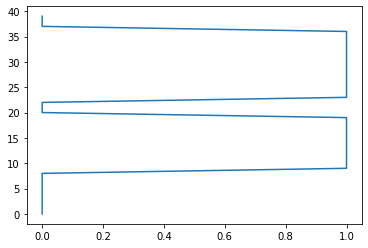

In [28]:
# vertical segmentation
test = z.transpose() * nb

# horizontal segmentation
test = w * test

# plot histogram projection result using pyplot
# plt.plot(x축 값, y축 값 )
# print(y_arr)
horizontal = plt.plot(w, y_arr)
# vertical = plt.plot(x_arr, z)

# plt.show(horizontal)
# plt.show(vertical)
# print('w=', w)
# print('y_arr=', y_arr)

In [29]:
df_w = df(w)
df_y_arr = df(y_arr)

concat_w_y_arr = pd.concat([df_w,df_y_arr], axis=1)
concat_w_y_arr.columns = ['x','y']

In [30]:
k = concat_w_y_arr[concat_w_y_arr['x']==1]
a = k['y']

In [31]:
li = []

for i in a:
    print(i)
    li.append(i)
    
print(type(li))

9
10
11
12
13
14
15
16
17
18
19
23
24
25
26
27
28
29
30
31
32
33
34
35
36
<class 'list'>


In [50]:
height, width, channel = img.shape

print(img.shape)

(46, 86, 3)


(25, 86, 3)


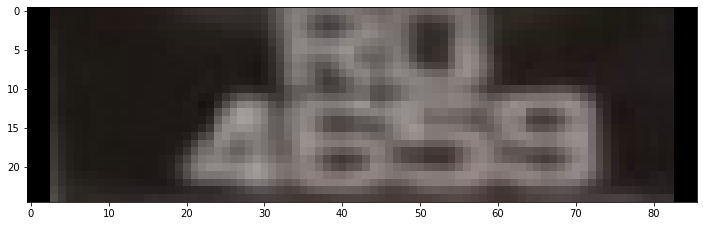

In [51]:
ext = img[14:39, 0:width-0]

height, width, channel = ext.shape

plt.figure(figsize=(12, 10))
plt.imshow(ext, cmap='gray')
print(ext.shape)

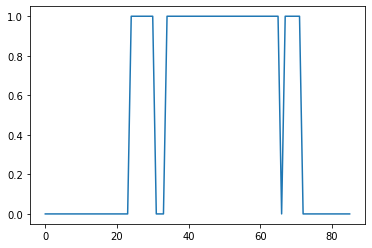

In [17]:
vertical = plt.plot(x_arr, z)

In [26]:
f = 0
ff = z[0]
t1 = list()
t2 = list()
for i in range(z.size):
    if z[i] != ff:
        f += 1
        ff = z[i]
        t1.append(i)
rect_h = np.array(t1)

f = 0
ff = w[0]
for i in range(w.size):
    if w[i] != ff:
        f += 1
        ff = w[i]
        t2.append(i)
rect_v = np.array(t2)

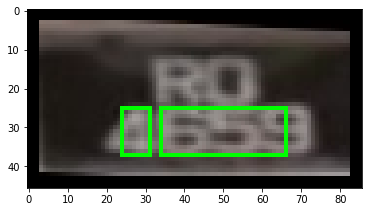

In [28]:
# take the appropriate height
rectv = []
rectv.append(rect_v[0])
rectv.append(rect_v[1])
max = int(rect_v[1]) - int(rect_v[0])
for i in range(len(rect_v) - 1):
    diff2 = int(rect_v[i + 1]) - int(rect_v[i])

    if diff2 > max:
        rectv[0] = rect_v[i]
        rectv[1] = rect_v[i + 1]
        max = diff2

# extract character
for i in range(len(rect_h) - 1):

    # eliminate slice that can't be a digit, a digit must have width bigger then 8
    diff1 = int(rect_h[i + 1]) - int(rect_h[i])

    if (diff1 > 5) and (z[rect_h[i]] == 1):
        # cutting nb (image) and adding each slice to the list characrter_list_image
        characrter_list_image.append(nb[int(rectv[0]):int(rectv[1]), rect_h[i]:rect_h[i + 1]])

        # draw rectangle on digits
        cv2.rectangle(img, (rect_h[i], rectv[0]), (rect_h[i + 1], rectv[1]), (0, 255, 0), 1)

# Show segmentation result
image = plt.imshow(img)
plt.show(image)

In [29]:
characrter_list_image

[array([[ 35,  53,  70,  84,  87,  80,  72],
        [ 46,  77, 104, 127, 132, 122, 109],
        [ 76, 107, 136, 156, 154, 141, 124],
        [ 95, 129, 146, 159, 156, 144, 127],
        [114, 140, 141, 145, 144, 134, 120],
        [130, 140, 126, 124, 129, 127, 116],
        [133, 128, 110, 107, 118, 125, 116],
        [125, 114,  99,  99, 113, 125, 116],
        [128, 119, 112, 115, 127, 138, 127],
        [139, 136, 133, 138, 147, 156, 143],
        [118, 121, 124, 134, 147, 153, 145],
        [ 83,  86,  91, 102, 115, 122, 118]], dtype=uint8),
 array([[ 94, 100, 107, 102,  95,  94,  98, 102, 110, 108,  82,  78,  88,
         101, 116, 128, 128, 125, 126, 125, 131, 128, 123, 111,  97,  84,
          87,  95, 107, 108, 112, 114],
        [111, 122, 133, 130, 124, 124, 128, 136, 148, 146, 114, 108, 121,
         132, 142, 140, 134, 127, 127, 124, 129, 128, 125, 115, 109, 107,
         118, 130, 142, 136, 132, 126],
        [122, 134, 134, 121, 108, 104, 106, 114, 126, 127, 130, 125, 

ValueError: could not broadcast input array from shape (12,7) into shape (12)

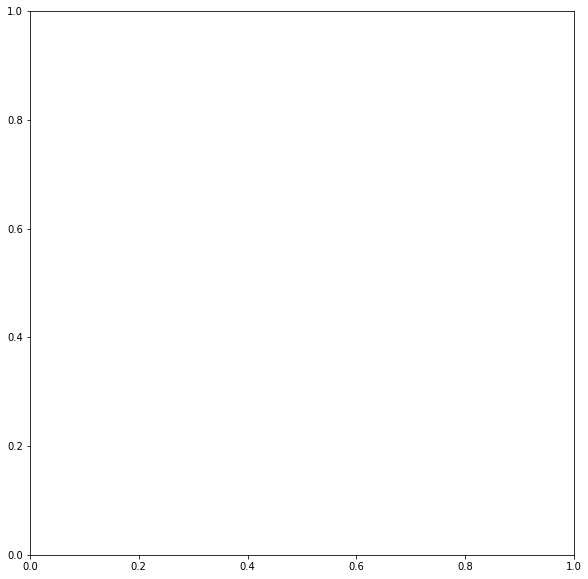

In [31]:
plt.figure(figsize=(12, 10))
plt.imshow(characrter_list_image, cmap='gray')

In [ ]:
if __name__ == '__main__':

    test_path = "./sample"
    # print('현재 폴더 경로', current_path)
    # print('테스트 폴더 경로', test_path)
    # 파일 불러오기, list 에 넣기

    image_list = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(test_path):
        for file in f:
            if '.jpg' or '.jpeg' or '.gif' or '.png' or '.pgm' in file:
                image_list.append(os.path.join(r, file))

    for name in image_list:
        img_color = cv2.imread(name)

        print(img_color)

        histo_chr = histogram_of_pixel_projection(img_color)
        print('???', histo_chr)